In [1]:
import h5py
import cv2
import scipy.io as io
import PIL.Image as Image
import numpy as np
import os
import glob
from matplotlib import pyplot as plt
from scipy.ndimage.filters import gaussian_filter 
import scipy
import json
from torchvision import transforms
import torchvision.transforms.functional as F
from matplotlib import cm as CM
from model import SANet
import torch
%matplotlib inline

/home/mask/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
from torchvision import datasets, transforms
transform=transforms.Compose([
                       transforms.ToTensor(),transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                     std=[0.229, 0.224, 0.225]),
                   ])

In [3]:
root = './data/'

In [4]:
#now generate the ShanghaiA's ground truth
part_A_train = os.path.join(root,'part_A_final/train_data','images')
part_A_test = os.path.join(root,'part_A_final/test_data','images')
part_B_train = os.path.join(root,'part_B_final/train_data','images')
part_B_test = os.path.join(root,'part_B_final/test_data','images')
path_sets = [part_A_test]

In [5]:
img_paths = []
for path in path_sets:
    for img_path in glob.glob(os.path.join(path, '*.jpg')):
        img_paths.append(img_path)

In [6]:
model = SANet()

In [7]:
model = model.cuda()

In [8]:
checkpoint = torch.load('2model_best.pth.tar')
print(checkpoint['epoch'])

158


In [9]:
model.load_state_dict(checkpoint['state_dict'])

In [10]:
def combine_density(den,patch_idx,patch):
    patch_size = np.shape(patch)
    den_size = np.shape(den)
#     print(np.shape(den))
#     print(patch_size)
#     print(patch_idx)
    #axis in density map
    dx = int(patch_idx%3)*int(patch_size[1]/2)
    dy = int(patch_idx/3)*int(patch_size[0]/2)

    dx_len = int(patch_size[1]*(3/4))
    dy_len = int(patch_size[0]*(3/4))
    #axis in patch
    px = 0
    py = 0 
    px_len = int(patch_size[1]*(3/4))
    py_len = int(patch_size[0]*(3/4))
    
    if dx!=0:
        dx = dx+int(patch_size[1]/4)
        px = int(patch_size[1]/4)
    if dx!=0 and dx+dx_len!=den_size[1]:
        dx_len = int(patch_size[1]/2)
        px_len = int(patch_size[1]/2)
    if dy!=0:
        dy = dy+int(patch_size[0]/4)
        py = int(patch_size[0]/4)
    if dy!=0 and dy+dy_len!=den_size[0]:
        dy_len = int(patch_size[0]/2)
        py_len = int(patch_size[0]/2)
        
#     print(dx,dy,dx_len,dy_len)
#     print(px,py,px_len,py_len)
        
    den[dy:dy+dy_len,dx:dx+dx_len] = patch[py:py+py_len,px:px+px_len]
    
        
        
    

In [11]:
std_transform=transforms.Compose([
   transforms.ToTensor(),transforms.Normalize(mean=[0.485, 0.456, 0.406],
                 std=[0.229, 0.224, 0.225]),
])
    
toTensor_transform = transforms.Compose([transforms.ToTensor()])

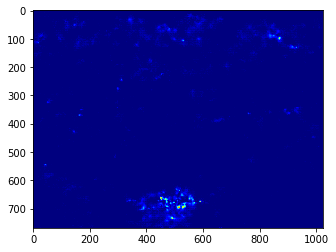

0 176.414046832826


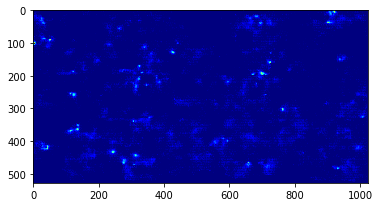

1 362.8033589408733


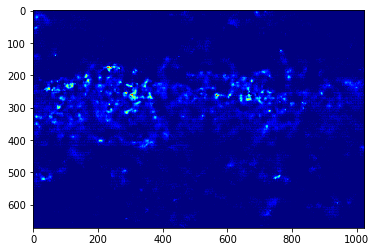

2 630.2659574407153


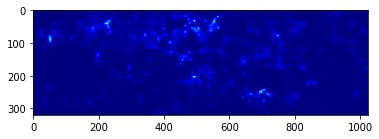

3 879.182786969468


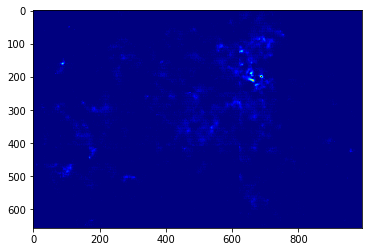

4 895.8749636667781


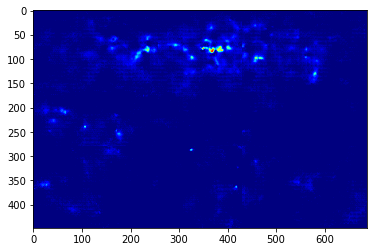

5 984.4195300228894


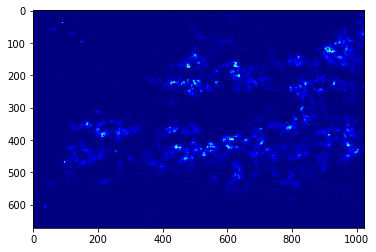

6 1128.888919819612


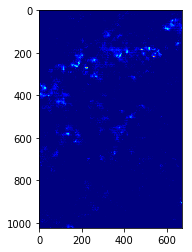

7 1161.786765047349


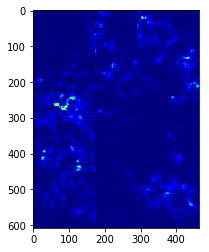

8 1239.8135137311183


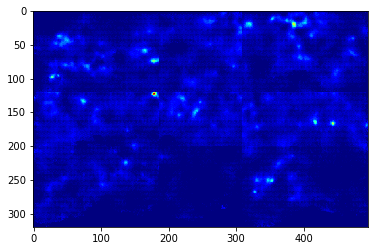

9 1252.0475343824364


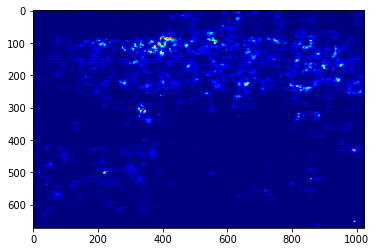

10 1391.2473858441226


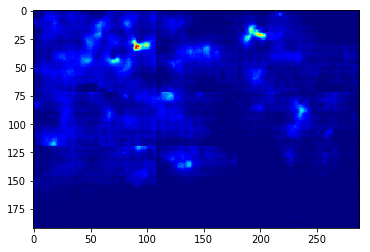

11 1454.75918837497


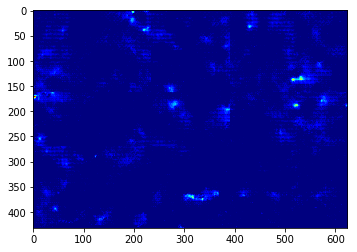

12 1620.8207973721437


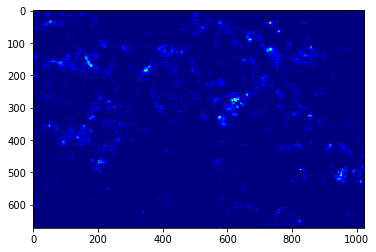

13 1752.3918365365826


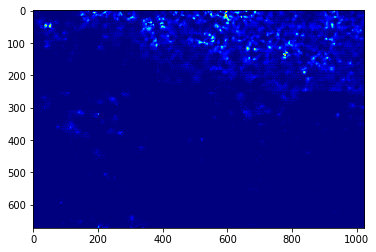

14 1771.1223493209109


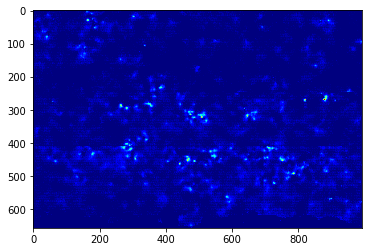

15 1842.5086119002663


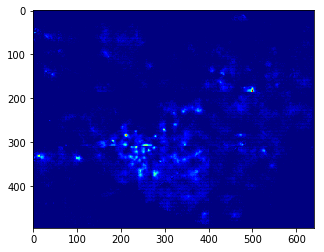

16 1871.883517656941


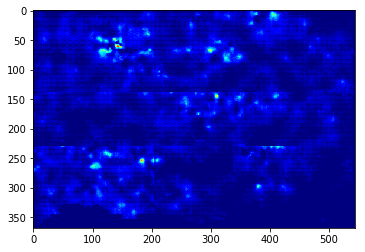

17 2003.7929505011998


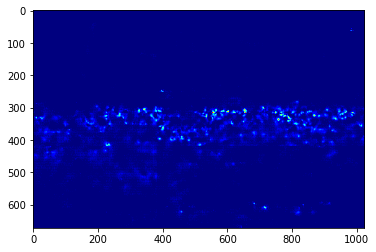

18 2071.6397606106475


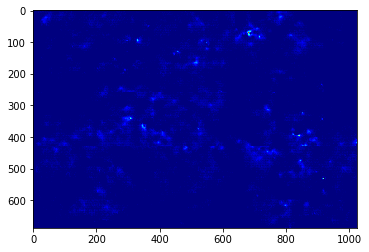

19 2208.818782731425


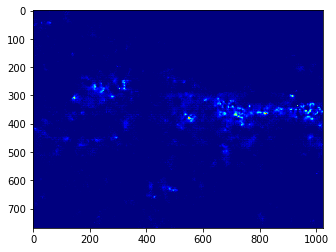

20 2241.5655594137497


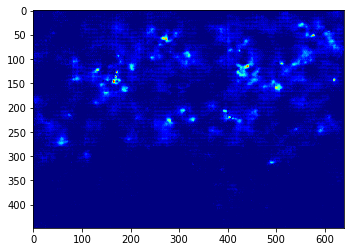

21 2274.2286535371095


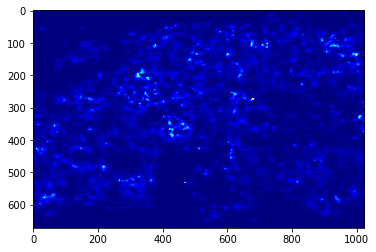

22 2577.311177376192


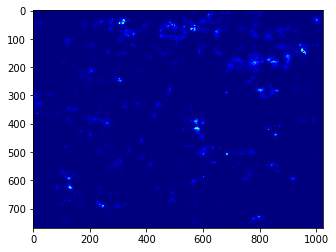

23 2655.90589658916


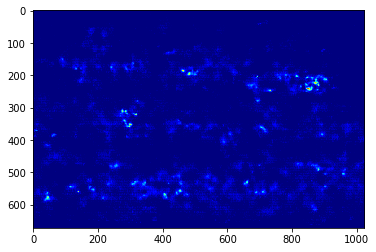

24 2755.9448035755195


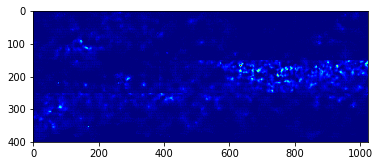

25 3008.189451164566


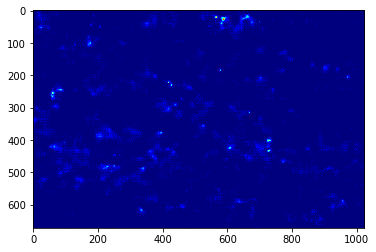

26 3287.4230171977542


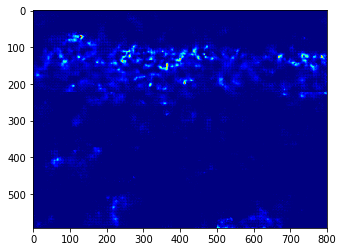

27 3463.994947654195


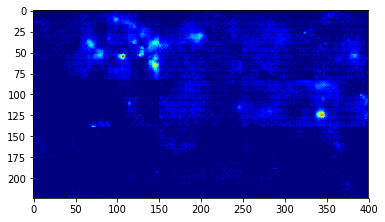

28 3480.4462876101024


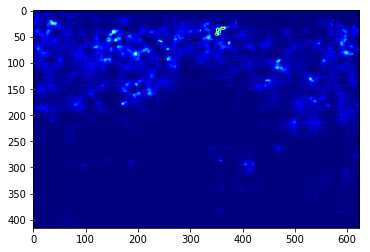

29 3545.7998309740797


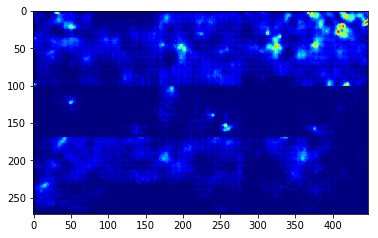

30 3697.6944187381305


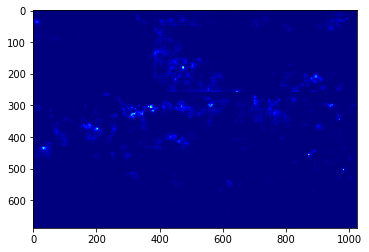

31 3698.8129276949912


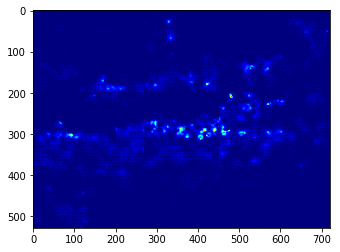

32 3723.2940623699687


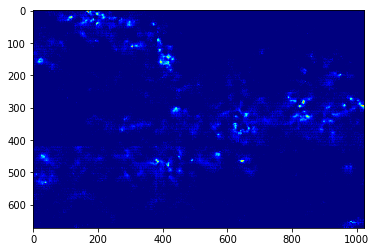

33 3743.6500115017407


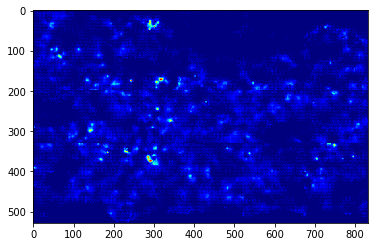

34 4626.086708507966


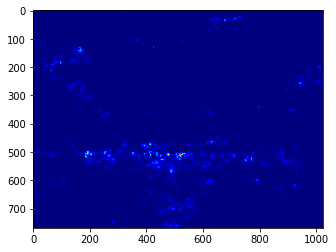

35 4785.65253350744


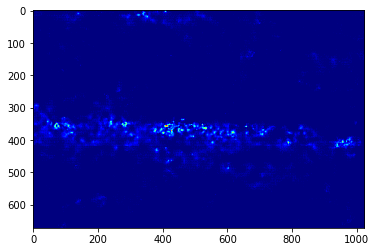

36 5064.084588272963


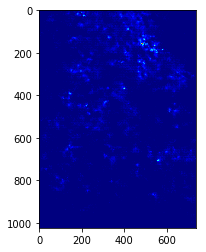

37 5442.505141956732


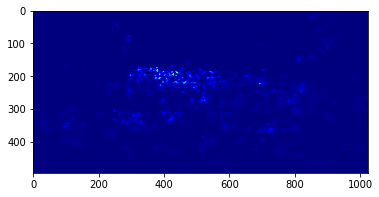

38 5454.992751032114


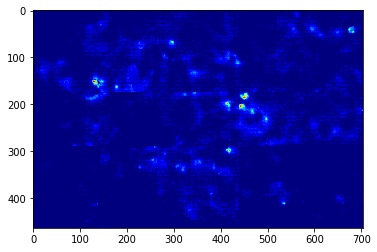

39 5487.411926248111


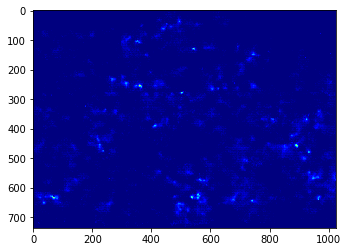

40 5747.542439967394


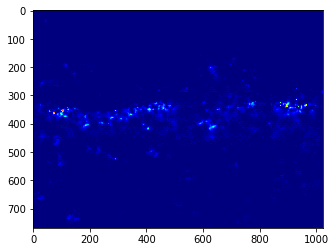

41 6464.172097549774


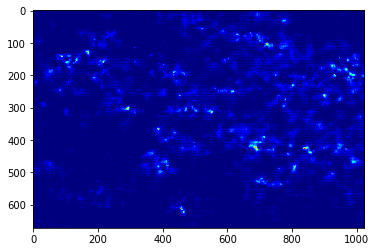

42 6729.312207309995


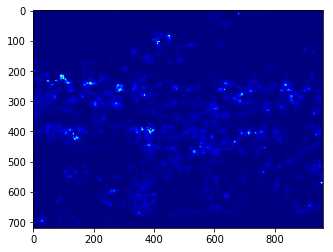

43 6914.439232727047


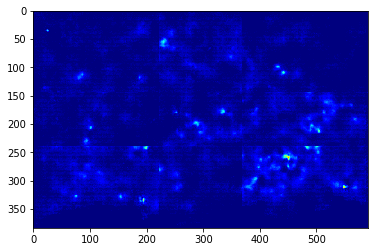

44 7012.169237968046


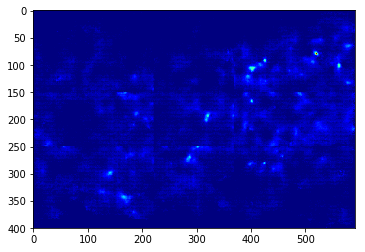

45 7134.978129986674


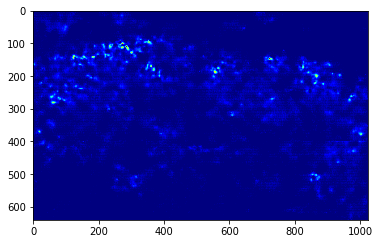

46 7634.540832042694


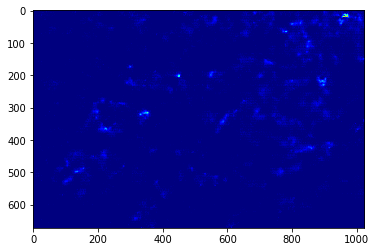

47 7650.251510279719


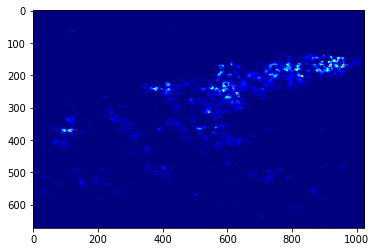

48 7796.635922115762


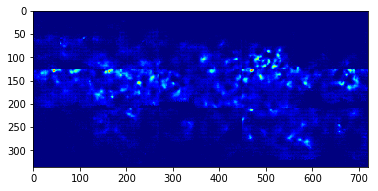

49 7915.223065613303


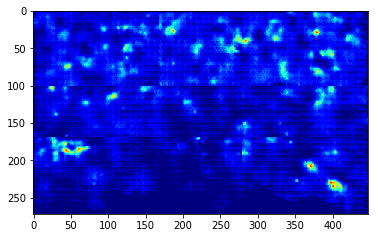

50 8047.440577004105


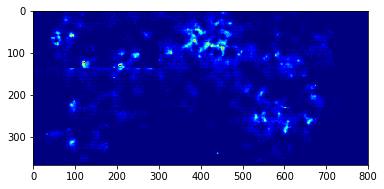

51 8141.583324209787


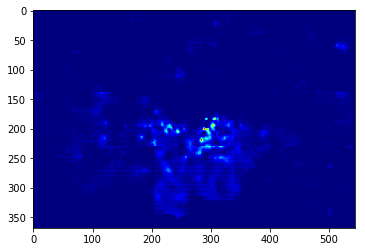

52 8198.894580774475


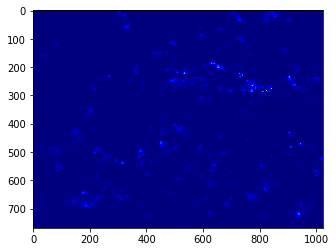

53 8283.227040610742


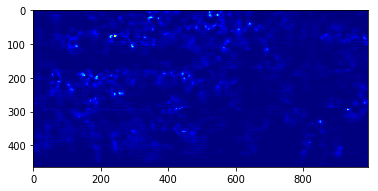

54 8941.588552470319


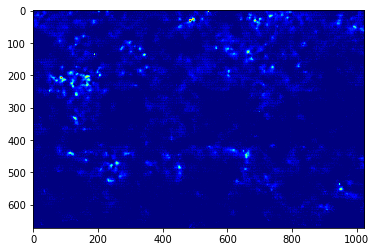

55 9171.58267207956


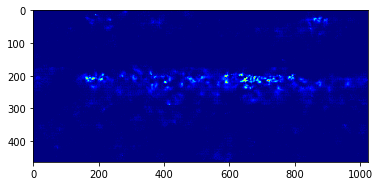

56 9295.115665011108


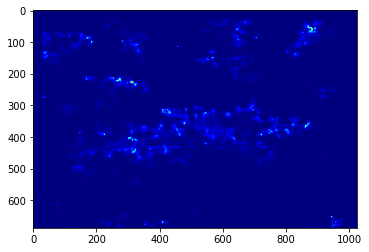

57 9396.439111605752


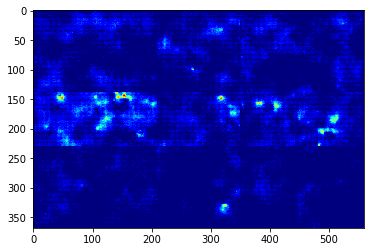

58 9400.24176076008


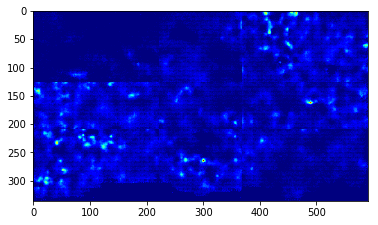

59 9527.030515866354


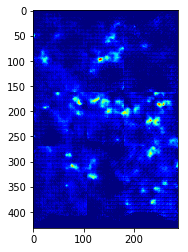

60 9584.355918161105


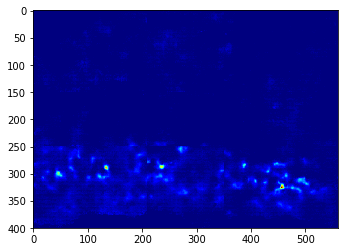

61 9610.069383043796


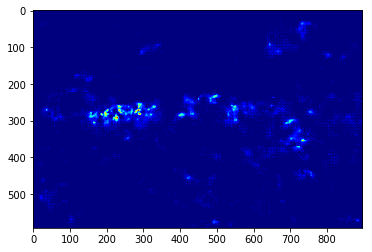

62 9722.609884334262


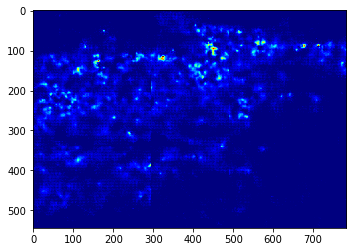

63 10106.733205749188


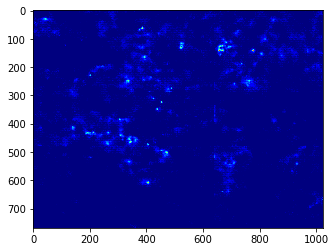

64 10363.125549640507


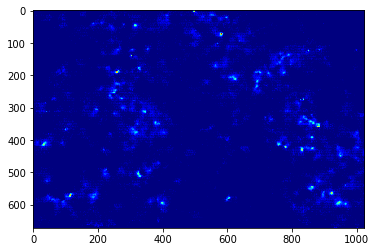

65 10509.986374052241


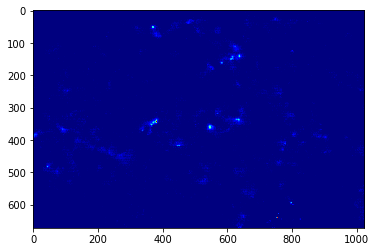

66 10675.080812524073


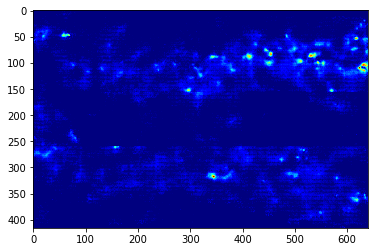

67 10755.615241649095


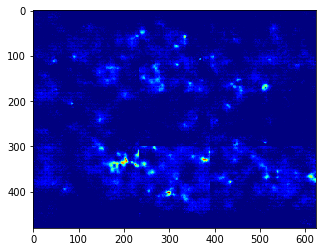

68 10837.416438793298


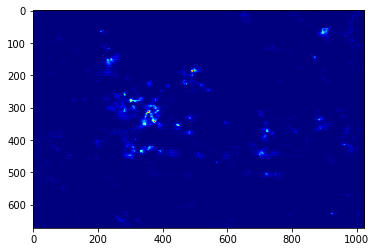

69 10931.335711246356


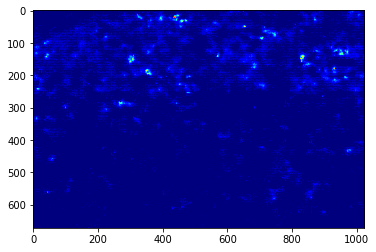

70 11776.7366843028


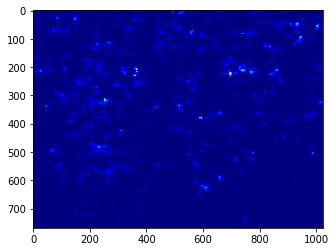

71 12305.0448729177


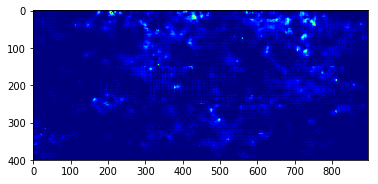

72 12394.02562822774


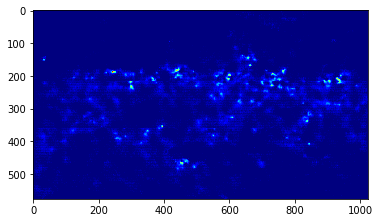

73 12494.00555404881


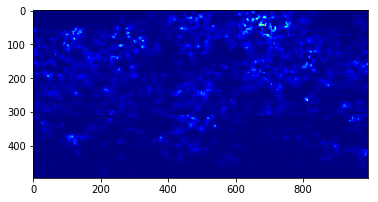

74 12903.392033438198


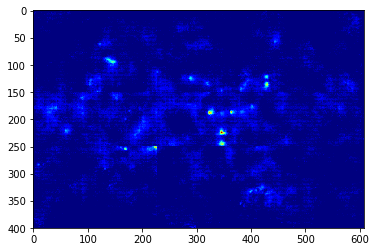

75 13108.35170754511


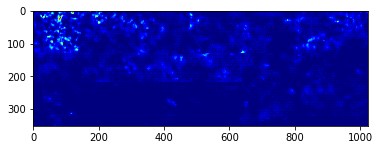

76 13341.327356000897


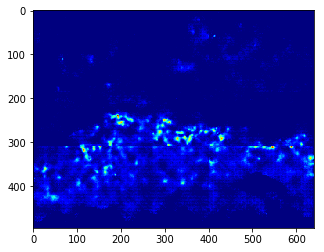

77 13650.576144003775


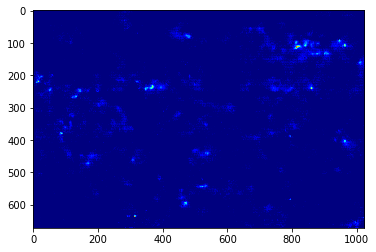

78 13726.015809510835


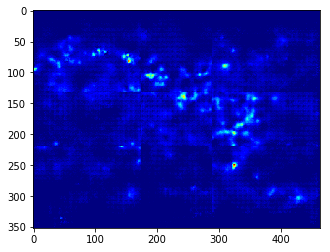

79 13866.440647228155


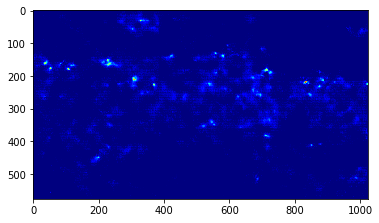

80 14216.076524586882


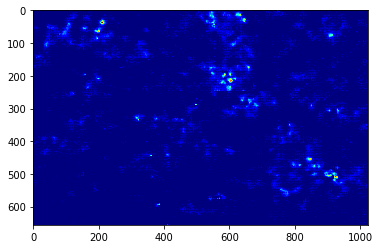

81 14260.525700178929


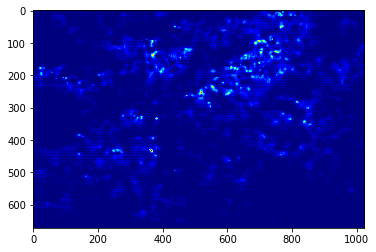

82 14827.540330890566


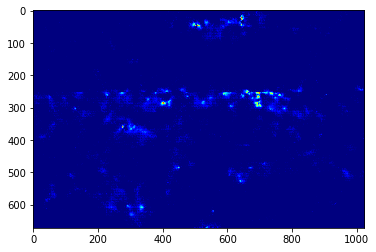

83 15039.777780761477


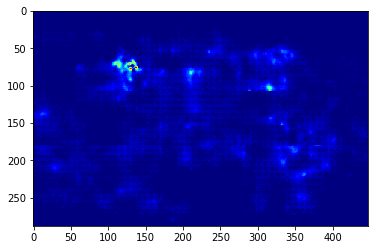

84 15390.803204259835


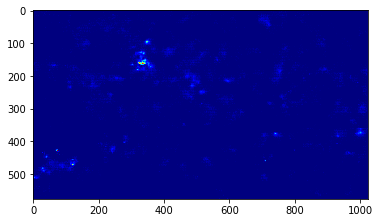

85 15413.768538247328


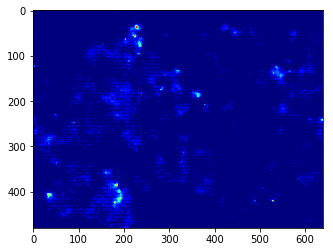

86 15578.956270936877


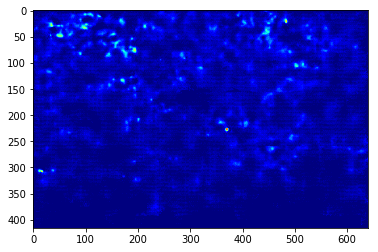

87 16272.956391382497


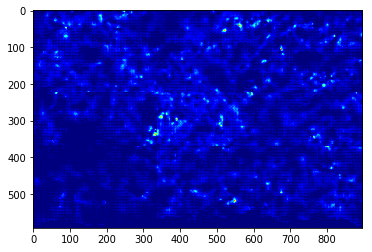

88 17114.06137555372


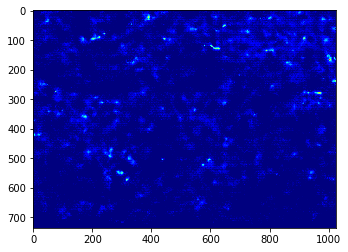

89 17581.958891950082


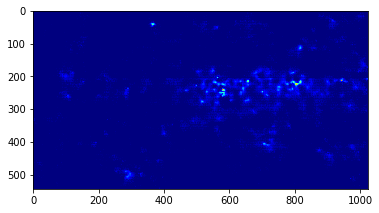

90 17589.717297882773


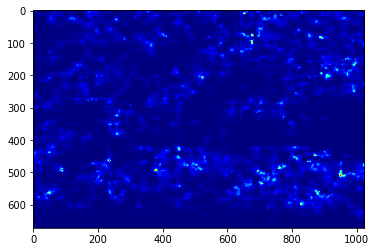

91 17642.533851237036


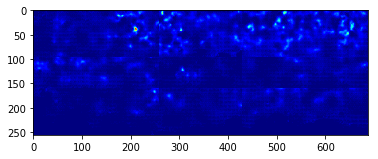

92 17836.990931998473


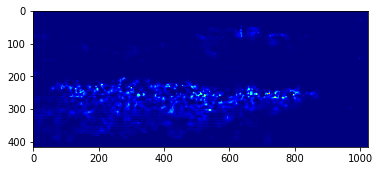

93 18583.046944975853


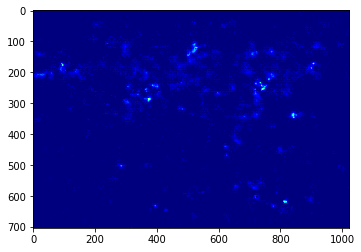

94 18619.475255168043


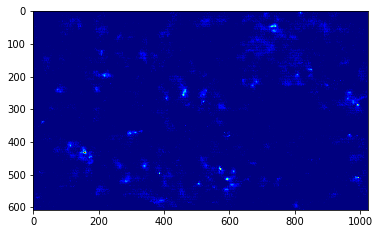

95 18724.68815354118


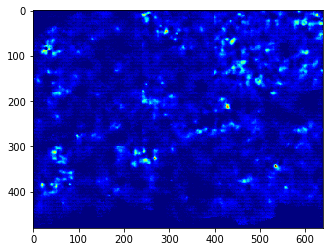

96 18776.87868344551


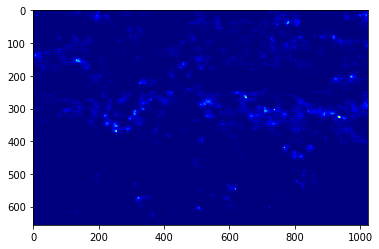

97 18794.90172981238


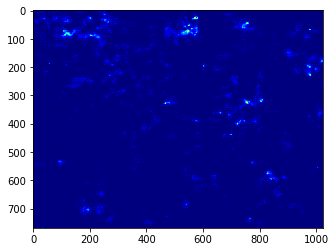

98 18929.073320067953


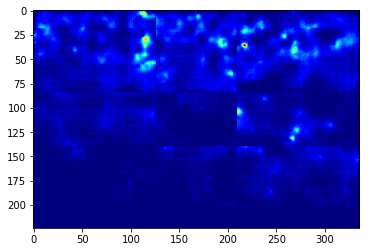

99 18947.370364547707


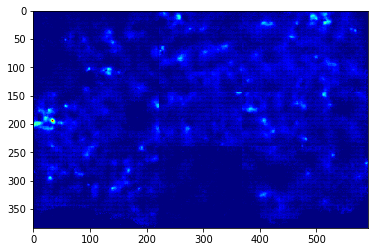

100 19076.153699932154


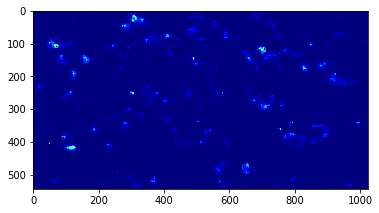

101 19188.708694912493


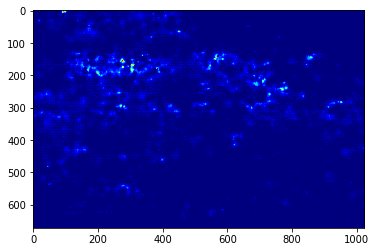

102 19491.644895552192


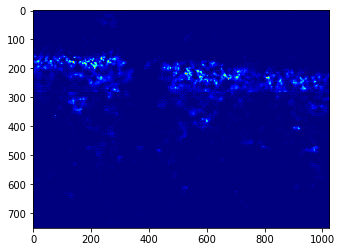

103 19658.023566557094


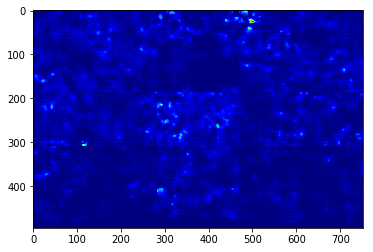

104 19954.393390368205


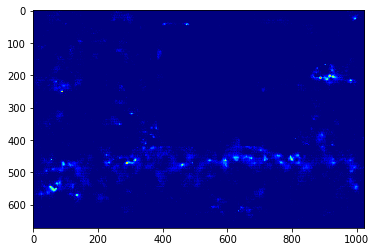

105 20003.412582843564


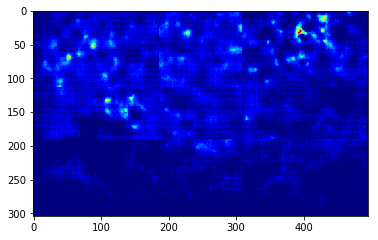

106 20118.73442111537


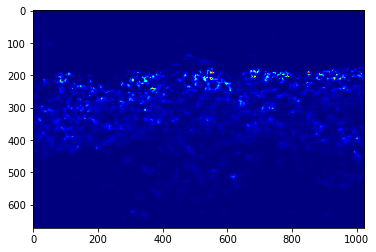

107 20501.261290310882


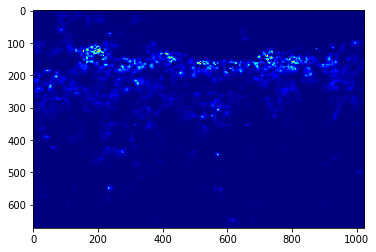

108 20898.978239278775


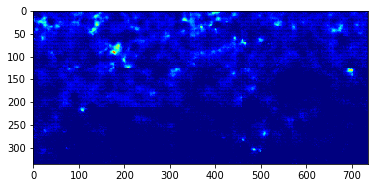

109 20955.339547393844


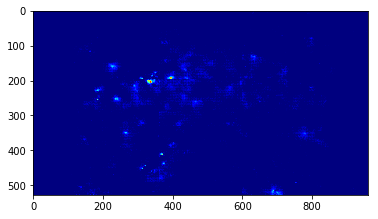

110 21152.14389925031


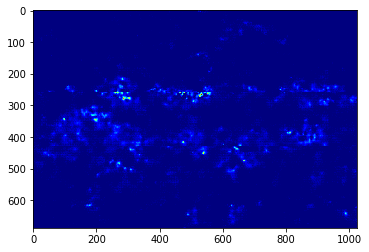

111 21290.600268684328


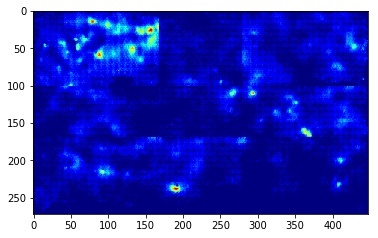

112 21371.875207689125


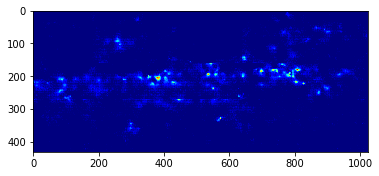

113 21469.739648127463


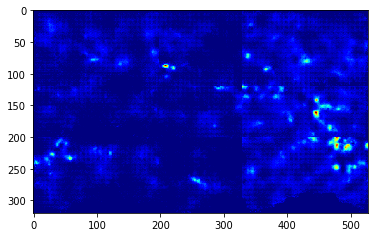

114 21514.22009008797


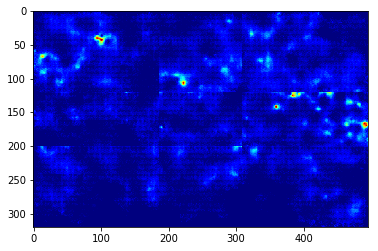

115 21607.380435843486


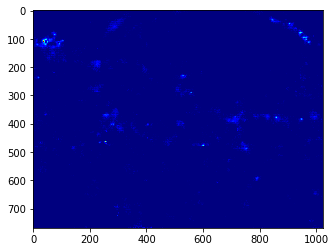

116 21845.373088827357


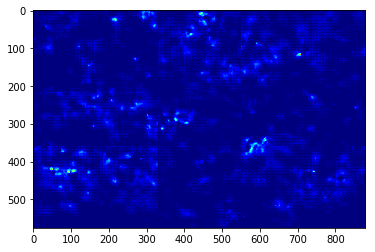

117 22061.055568136275


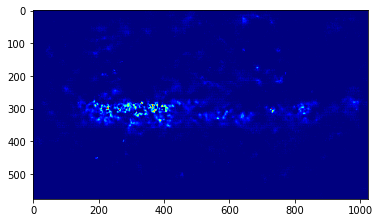

118 22131.046091357246


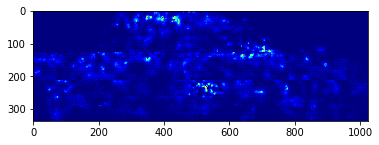

119 22899.659355067182


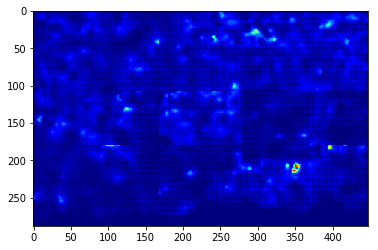

120 23000.521678749472


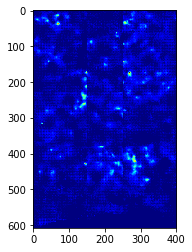

121 23907.707070343662


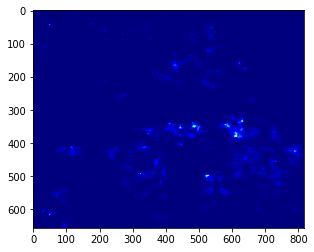

122 23908.701139125507


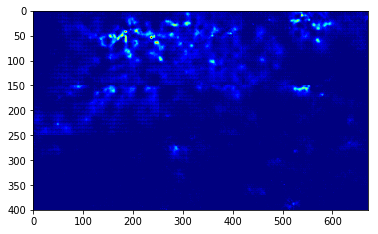

123 23988.69360677572


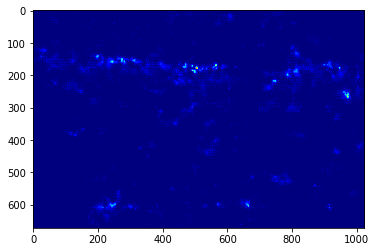

124 24026.01667842921


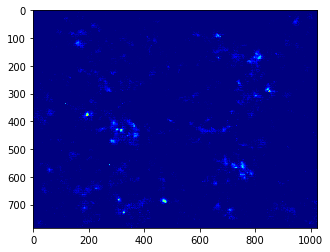

125 24079.670668927953


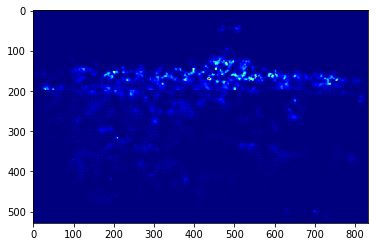

126 24261.261892313603


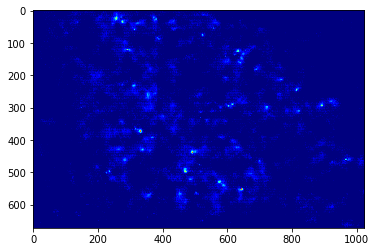

127 24369.733760352246


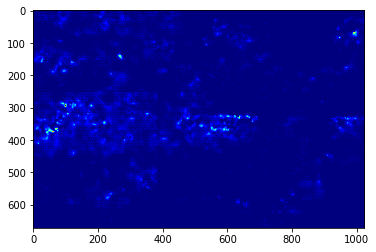

128 24452.93840740947


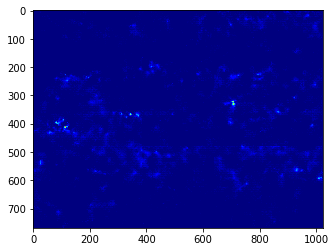

129 24933.68182418542


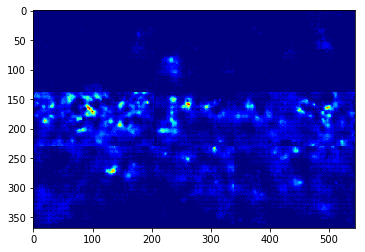

130 24963.751307977363


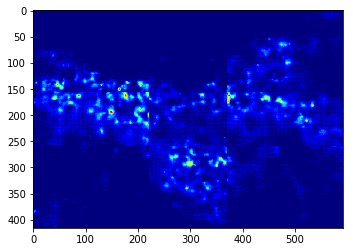

131 25026.386846904177


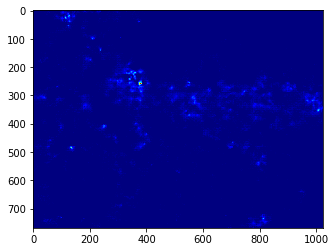

132 25030.77242227737


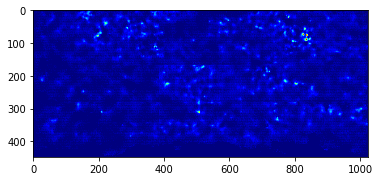

133 26402.182064049877


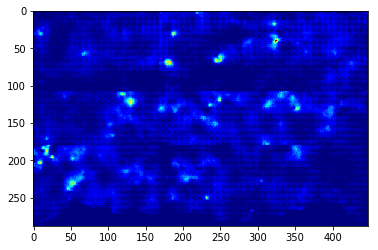

134 26416.748446545098


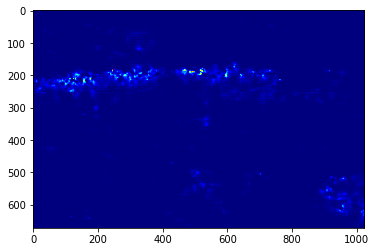

135 26545.189262742177


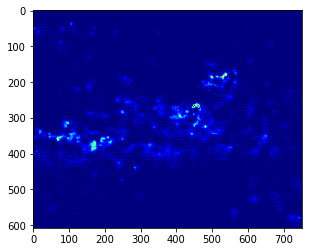

136 26795.033254930284


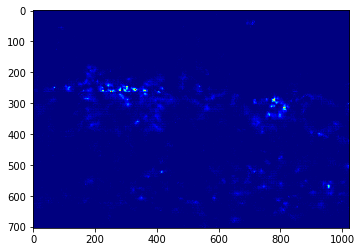

137 27024.794345029164


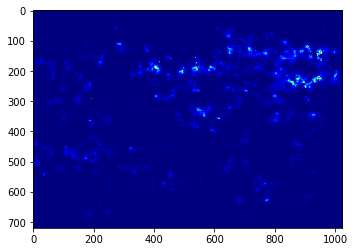

138 27374.153620454017


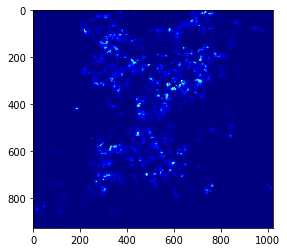

139 27462.70755110681


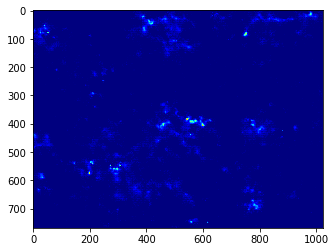

140 27606.717605354264


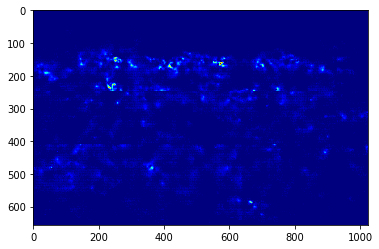

141 27621.485236186534


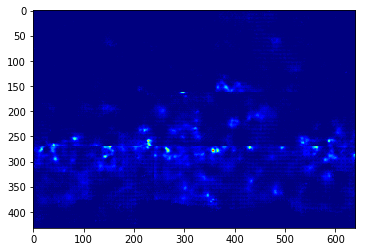

142 27682.225344995502


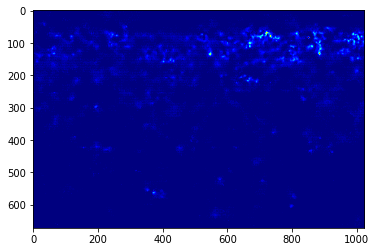

143 28169.18674920965


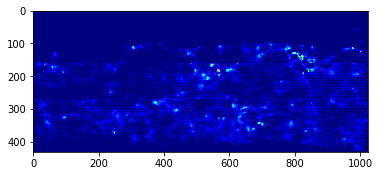

144 28320.675444594584


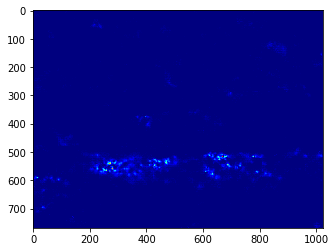

145 28499.63962894678


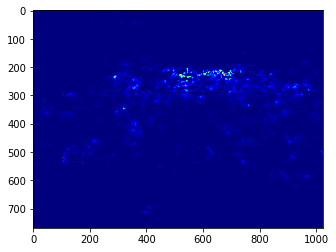

146 28882.0283826706


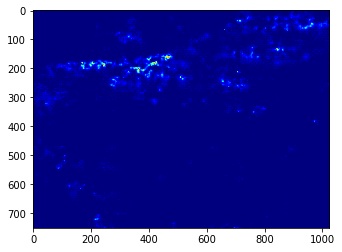

147 28941.600602417253


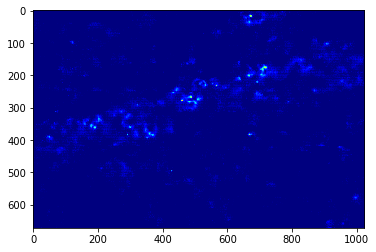

148 29131.717115792446


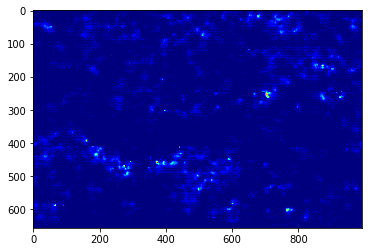

149 29137.99952039821


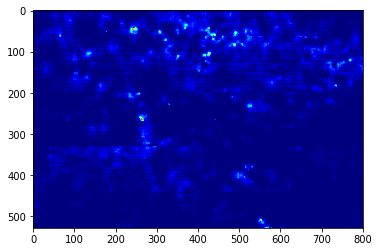

150 29235.056084724143


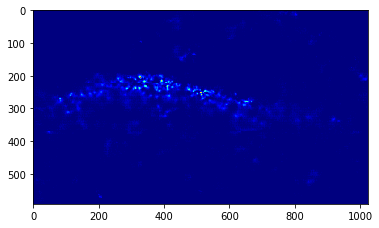

151 29330.722240013536


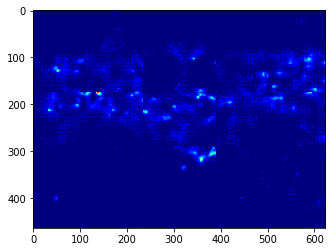

152 29657.215726963244


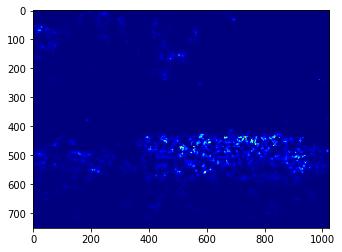

153 30209.124435965903


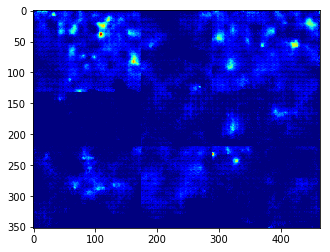

154 30294.7686575735


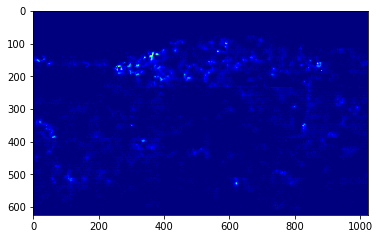

155 30442.888906601816


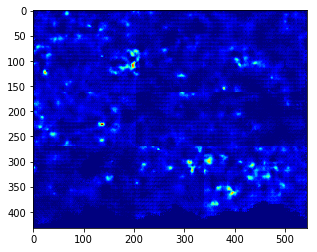

156 30610.231521608774


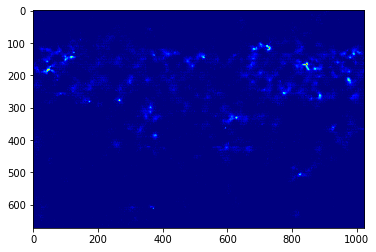

157 30630.39153508609


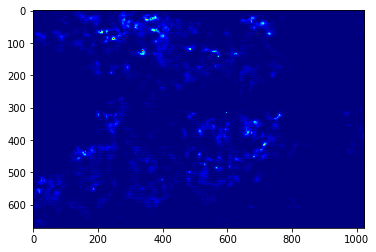

158 30716.432745997794


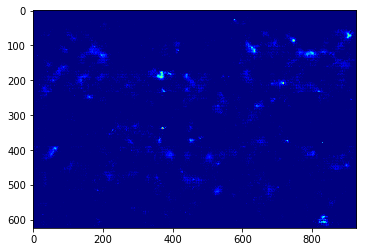

159 30773.551859271713


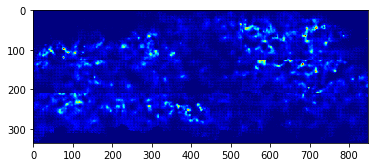

160 31016.22360809846


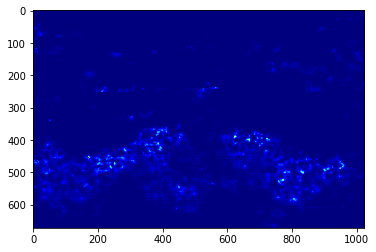

161 31807.964880601503


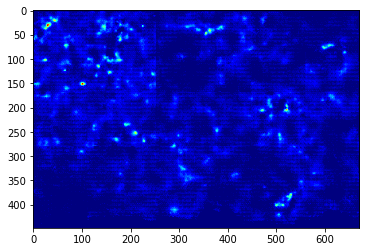

162 31819.645397312008


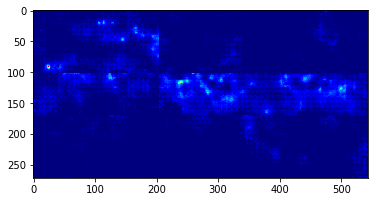

163 31838.746553840116


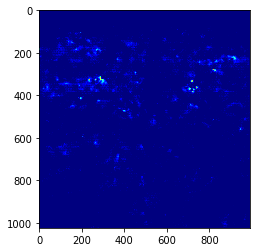

164 32669.99686870631


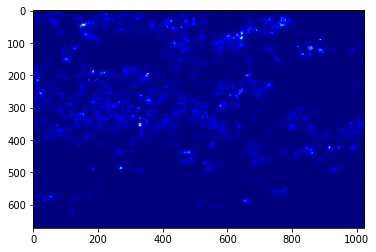

165 32716.718621360138


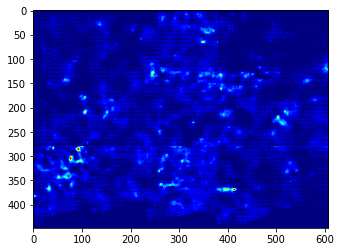

166 32917.14720300026


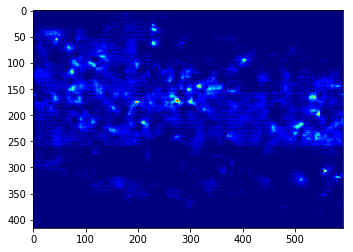

167 33016.24138178956


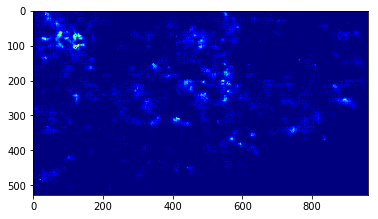

168 33092.808506359346


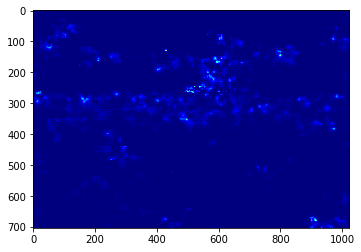

169 33214.31517461315


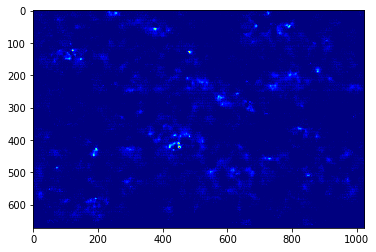

170 33250.9394771778


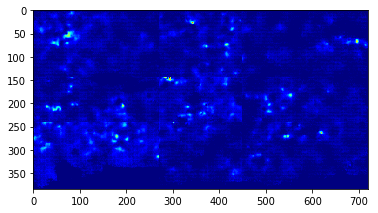

171 33527.633519237395


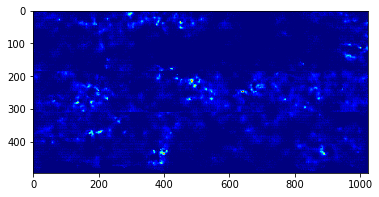

172 34020.64808957791


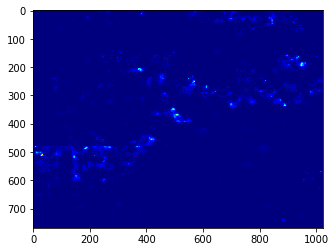

173 34035.39039506251


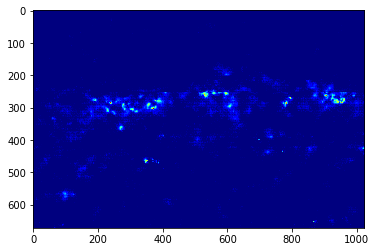

174 35454.5996162747


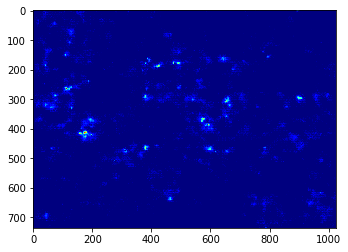

175 35537.91025417764


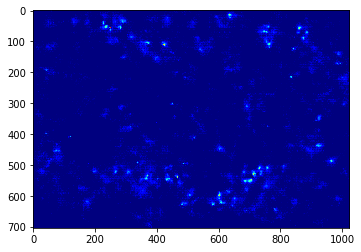

176 35609.60170668084


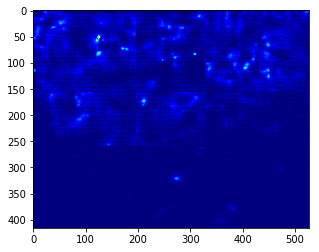

177 35743.563318133354


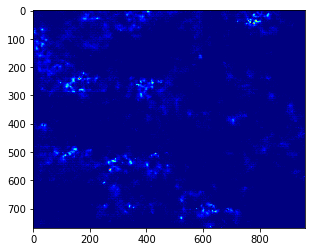

178 35924.04180506058


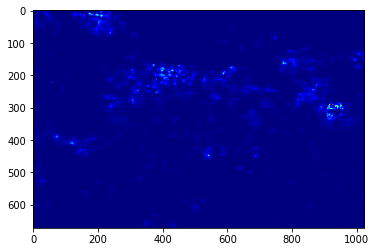

179 36139.2252735747


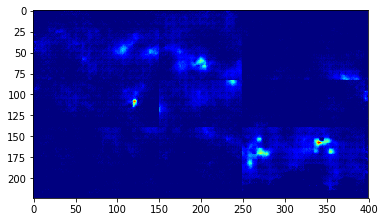

180 36148.92150884867


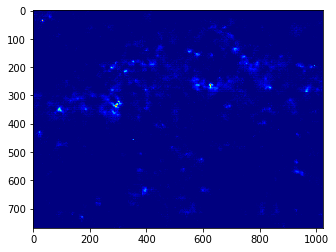

181 36189.85287763877
198.8453454815317


In [12]:
mae = 0
for i in range(len(img_paths)):
    img = Image.open(img_paths[i]).convert('RGB')
    gt_file = h5py.File(img_paths[i].replace('.jpg','.h5').replace('images','ground_truth'),'r')
    groundtruth = np.asarray(gt_file['density'])
    
    img = img.crop((0,0,int(img.size[0]/16)*16,int(img.size[1]/16)*16))
    target = groundtruth[0:img.size[1],0:img.size[0]]
    
    img = std_transform(img)
    img = transforms.ToPILImage()(img).convert('RGB') 

    den = np.zeros(np.shape(target))
    crop_size = (int(img.size[0]/2),int(img.size[1]/2))
    
    for j in range(9):
        dx = (int(j%3)*int(crop_size[0]/2))
        dy = (int(j/3)*int(crop_size[1]/2))
        patch = img.crop((dx,dy,crop_size[0]+dx,crop_size[1]+dy))
#         print(j)
#         plt.imshow(patch)
#         plt.pause(0.05)
        patch = toTensor_transform(patch)
        patch = patch.cuda()

        with torch.no_grad():
            output = model(patch.unsqueeze(0))  
            output = output.squeeze().detach().cpu().numpy()
#             output_show = 255*output/np.max(output)
#             plt.imshow(output_show,cmap=CM.jet)
#             plt.pause(0.05)
            
        combine_density(den,j,output)
        
    den_show = 255*den/np.max(den)
    plt.imshow(den_show,cmap=CM.jet)
    plt.pause(0.05)

    mae += abs(np.sum(den)-np.sum(target))
    print(i,mae)
print(mae/len(img_paths))